<img src="https://929687.smushcdn.com/2407837/wp-content/themes/pyi/assets/images/logo.png?lossy=1&strip=1&webp=1" width="300"/>

**by: [João Ataíde](https://www.joaoataide.com/)**
___

In [22]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.axis('off')
    plt.show()

## **Load Data**

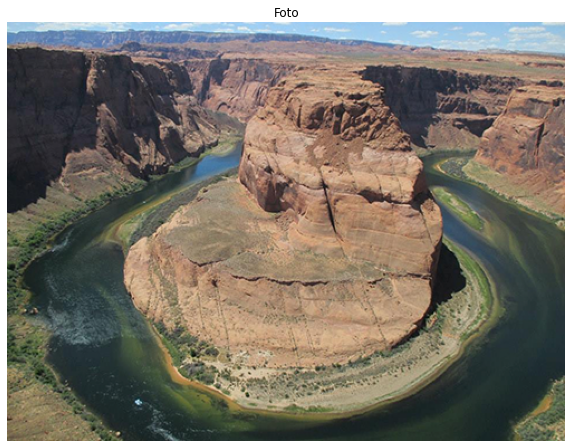

In [63]:
PASTA  = r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics"
args = {"image": f"{PASTA}\\horseshoe_bend.png"}
image = cv2.imread(args["image"])
plt_imshow("Foto", image)

#### Gray Histogram

In [64]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

(0.0, 256.0)

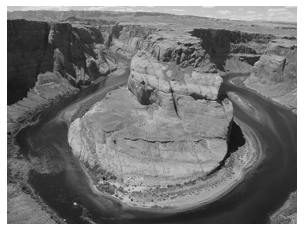

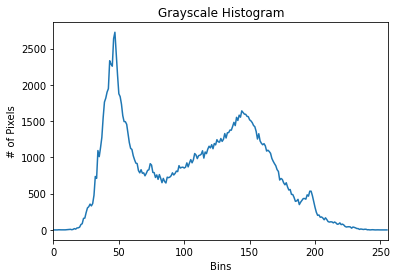

In [65]:
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

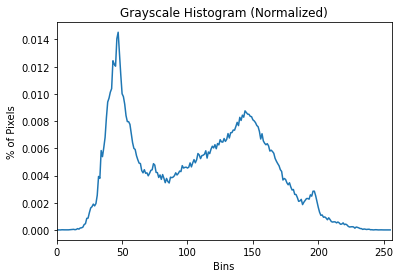

In [66]:
hist /= hist.sum()

plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

#### Color Histogram

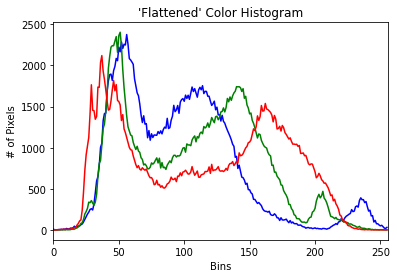

In [67]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

2D histogram shape: (32, 32), with 1024 values


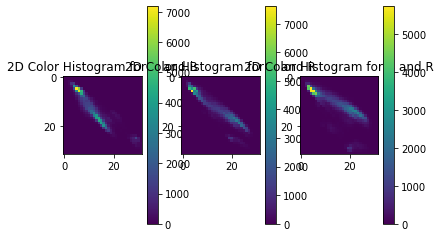

In [69]:
fig = plt.figure()

ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
                    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
                    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
                    [0, 256, 0, 256])

p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

print("2D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))


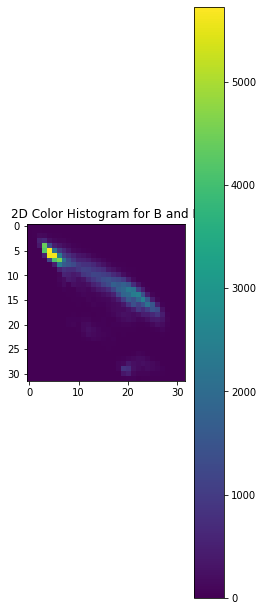

In [71]:
fig = plt.figure(figsize=(12, 20))
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
                    [0, 256, 0, 256])

p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

3D histogram shape: (32, 32), with 1024 values


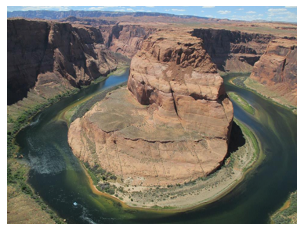

In [72]:
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))
plt.show()

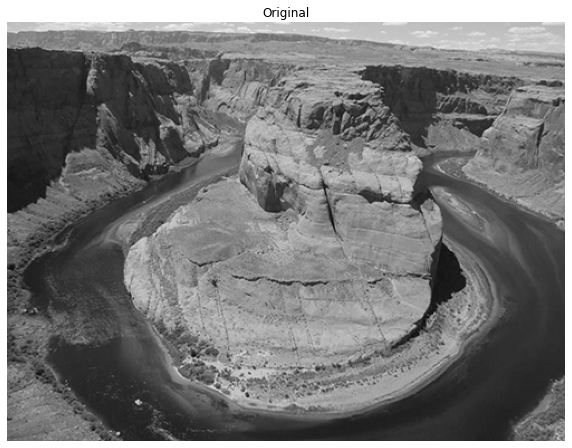

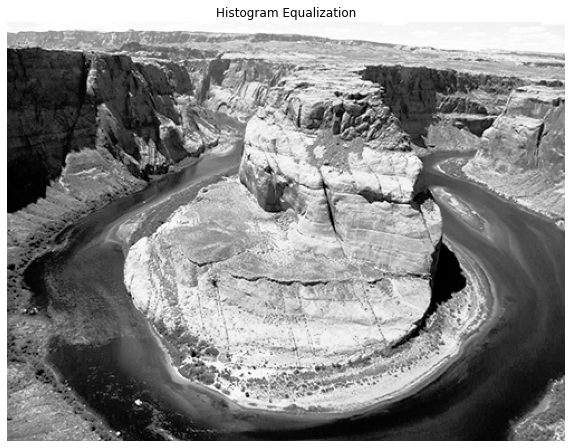

In [73]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

eq = cv2.equalizeHist(image)

plt_imshow("Original", image)
plt_imshow("Histogram Equalization", eq)

In [80]:
#Taje de bands red green blue to have coordenat (40, 40)
g = eq[272, 146]
print(f"The value at band {g}")

The value at band 210


#### Histograms and Masks

In [54]:
def plot_histogram(image, title, mask=None):

    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    for (chan, color) in zip(chans, colors):

        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

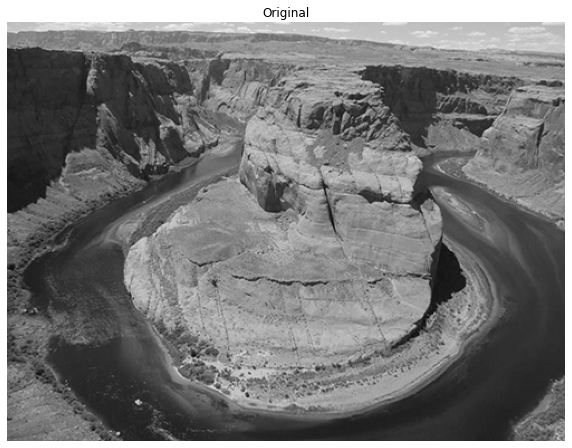

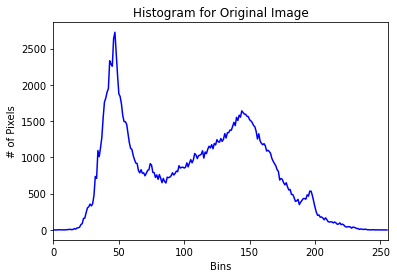

In [55]:
plt_imshow("Original", image)
plot_histogram(image, "Histogram for Original Image")

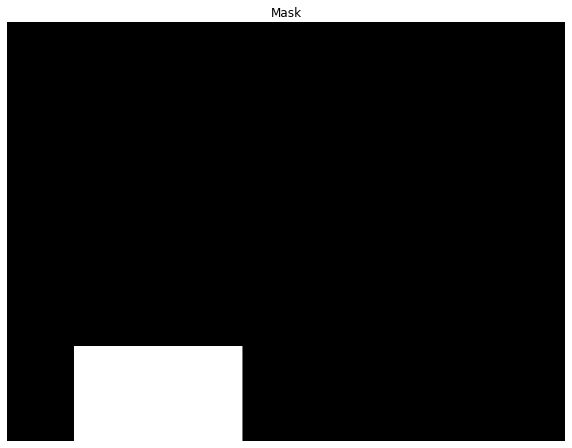

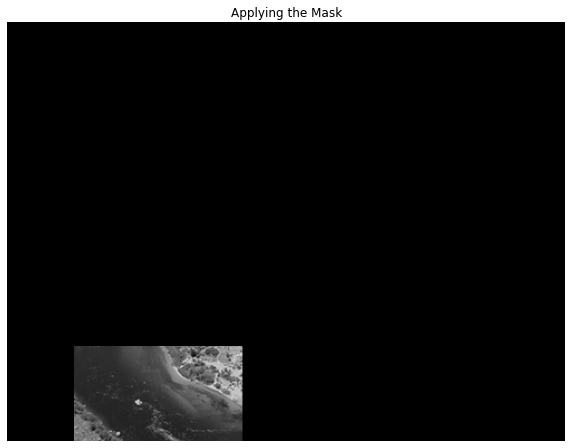

In [56]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
plt_imshow("Mask", mask)


masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Applying the Mask", masked)

In [82]:
8*16*9

1152